In [86]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib

Using matplotlib backend: MacOSX


In [2]:
from sklearn.datasets import load_boston

In [3]:
# サンプルデータ
boston = load_boston()

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

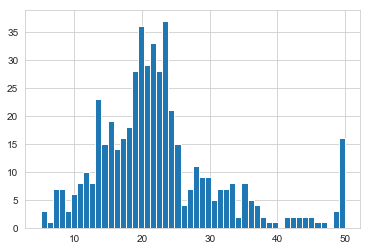

In [5]:
plt.hist(boston.target, bins=50)

Text(0.5,0,'number of rooms')

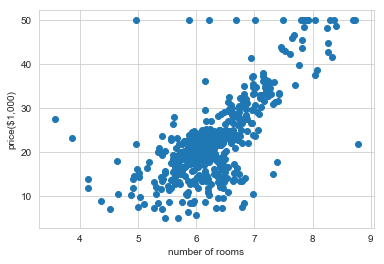

In [8]:
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel('price($1,000)')
plt.xlabel('number of rooms')

In [9]:
# dataframe化
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston_df['Price'] = boston.target

In [13]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/Users/kmoriwak/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


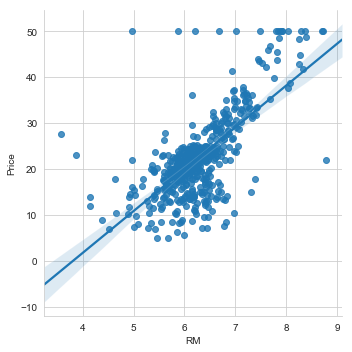

In [14]:
sns.lmplot('RM', 'Price', data = boston_df)

In [16]:
# 単回帰　直線式を求める
# 部屋数
X = boston_df.RM

In [17]:
X.shape

(506,)

In [58]:
X = np.vstack(boston_df.RM)

In [59]:
# 506行1列
X.shape

(506, 1)

In [20]:
Y = boston_df.Price

In [60]:
# y = ax + bをベクトルで表すと y = Ap
# A = (x 1), p = (a b) // pは2行1列
X = np.array([[value, 1.0] for value in X ]) 

In [61]:
X

array([[array([6.575]), 1.0],
       [array([6.421]), 1.0],
       [array([7.185]), 1.0],
       ...,
       [array([6.976]), 1.0],
       [array([6.794]), 1.0],
       [array([6.03]), 1.0]], dtype=object)

In [63]:
X = X.astype(np.float64)

In [64]:
# linalg: 線形代数, lstsq: 最小二乗法
a, b = np.linalg.lstsq(X, Y, rcond=None)[0]

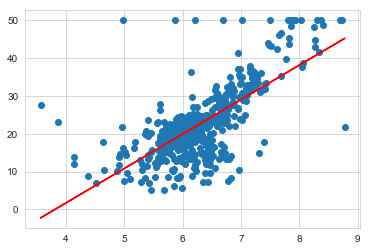

In [66]:
plt.plot(boston_df.RM, boston_df.Price, 'o')
x = boston_df.RM
plt.plot(x, a*x+b, 'r')

In [67]:
# 誤差
result =  np.linalg.lstsq(X, Y, rcond=None)
result

(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

In [69]:
error_total = result[1]
# 平均二乗誤差の平方根 = 標準偏差
rmse = np.sqrt(error_total/len(X))
rmse

array([6.60307139])

In [70]:
# 重回帰
import sklearn
from sklearn.linear_model import LinearRegression

In [71]:
lreg = LinearRegression()

In [74]:
# 説明変数（priceは目的変数なので削ったものを入れる）
X_multi = boston_df.drop('Price', 1)

In [75]:
X_multi.shape

(506, 13)

In [77]:
# 目的変数
Y_target = boston_df.Price

In [79]:
# モデルを作る
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
# 切片
lreg.intercept_

36.491103280361344

In [82]:
#　係数の数
len(lreg.coef_)

13

In [83]:
coeff_df = DataFrame(boston_df.columns)

In [84]:
coeff_df.columns = ['Features']

In [87]:
coeff_df['係数見積もり'] = pd.Series(lreg.coef_)

In [89]:
# RM(rooms)が価格に大きな影響を与えていることがわかる
coeff_df

,Features,係数見積もり
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [94]:
# 予測する(*_trainで学習して*_testでテスト)
# sklearn.model_selectionで学習データとテストデータに分けてくれる(旧 cross_validation)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, boston_df.Price)

In [95]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [96]:
lreg = LinearRegression()

In [97]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
# 教師データから予測してみる（もともとこのデータからモデル作ったのでうまくいくだろう）
pred_train = lreg.predict(X_train)

In [101]:
# テスト用データで予測してみる
pred_test = lreg.predict(X_test)

In [102]:
# モデルの平均２乗誤差（教師データ）
np.mean((Y_train - pred_train)**2)

21.304394067066273

In [104]:
# モデルの平均2乗誤差（テストデータ）
np.mean((Y_test - pred_test) ** 2)

25.038585032984766

In [106]:
# 残差プロット
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.5)
test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-1.0, xmax=50)
plt.legend((train, test), ('train', 'test'), loc='lower left')

In [ ]:
# 残差プロットはy=0の周りに均等に配置されていることが重要